You are given a dataset which consists of the medical records of Pima Indian women. The problem is to find if a new person whose medical data is given as input has a chance of getting diabetes in the next 5 years. This is indicated by 1 or 0 in the last column of the dataset. Please use classification models such as KNN and Naïve Bayes and find the best of the two models for the given data set. Use python to prepare the data and create the models and cross-validate the dataset. Please make sure you also use appropriate performance measures, error values, bias and variance to come to conclusion of the best dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

**Read CSV file into a DataFrame**

In [2]:
data = pd.read_csv("../input/pima indian diabetes.csv", 
                 names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                       "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

**Display the first five rows of the data**

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,,33,1


**Summary of the data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null object
BloodPressure               768 non-null object
SkinThickness               768 non-null object
Insulin                     768 non-null object
BMI                         768 non-null object
DiabetesPedigreeFunction    768 non-null object
Age                         768 non-null object
Outcome                     768 non-null int64
dtypes: int64(2), object(7)
memory usage: 54.1+ KB


**Convert the DatFrame objects into a integer/float**

In [5]:
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                       "BMI", "DiabetesPedigreeFunction", "Age"]

for feature in features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

# print the data summary again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     762 non-null float64
BloodPressure               766 non-null float64
SkinThickness               764 non-null float64
Insulin                     760 non-null float64
BMI                         760 non-null float64
DiabetesPedigreeFunction    762 non-null float64
Age                         764 non-null float64
Outcome                     768 non-null int64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


**Detect any missing values in the data**

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     6
BloodPressure               2
SkinThickness               4
Insulin                     8
BMI                         8
DiabetesPedigreeFunction    6
Age                         4
Outcome                     0
dtype: int64

**Replace missing values with a mean of columns/features**

In [7]:
for feature in features:
    data[feature].fillna(data[feature].mean(), inplace=True)

# check if there are still any missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Visualizing the distribution of features**

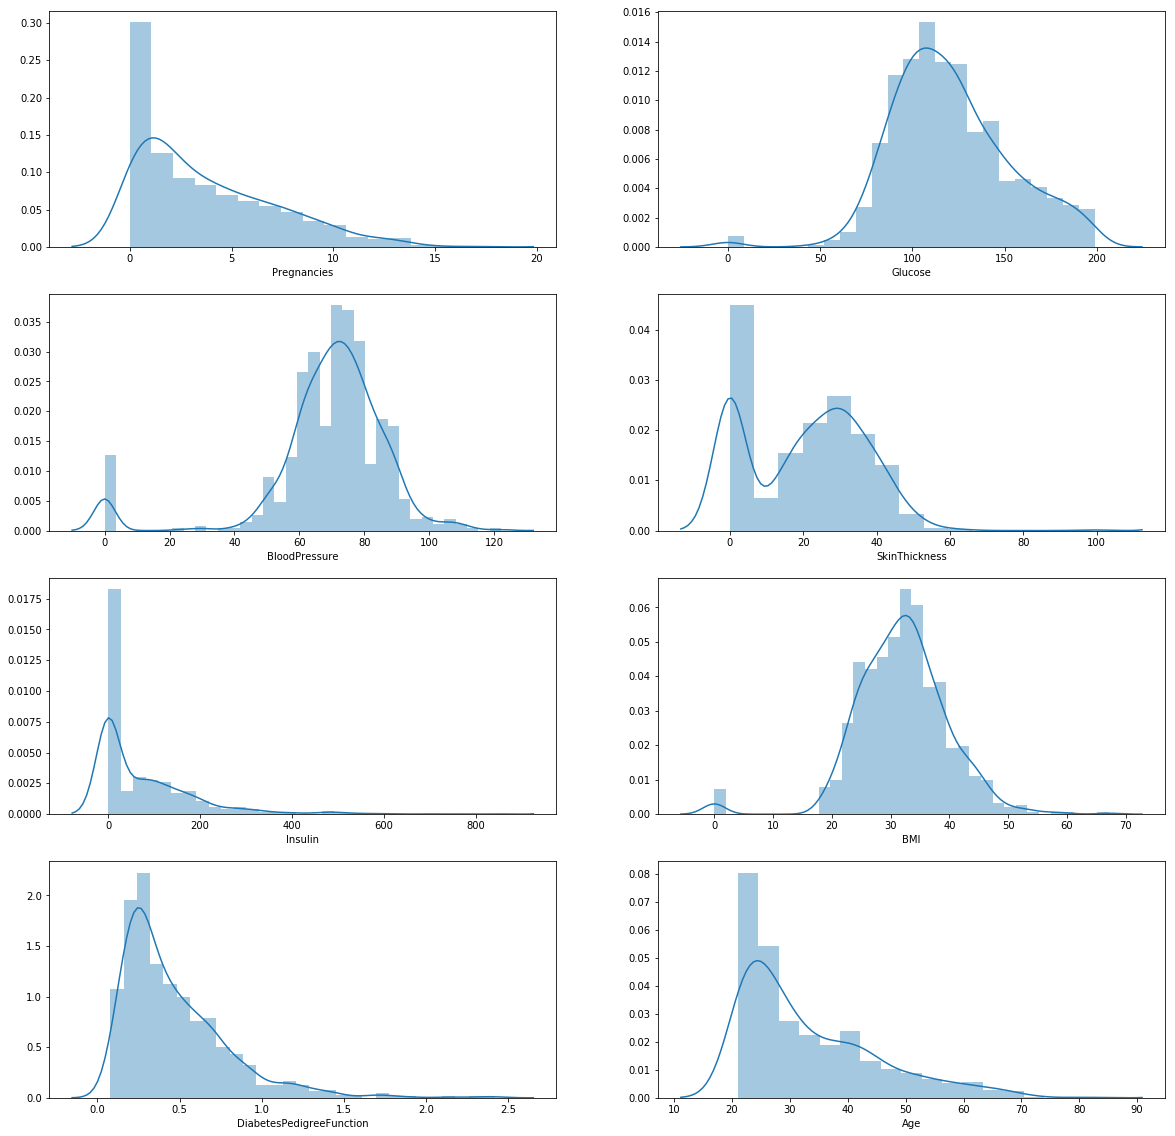

In [8]:
plt.subplots(figsize=(20,20))

for i, j in zip(features, range(len(features))):
    plt.subplot(4, 2, j+1)
    sns.distplot(data[i])

**Following scatter plot shows an association of BMI with thickness of skin layer**

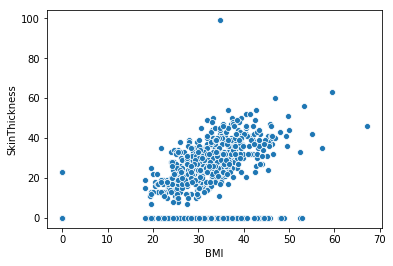

In [9]:
sns.scatterplot(data['BMI'], data['SkinThickness'])

**Following scatter plot shows an association of insulin and blood glucose**

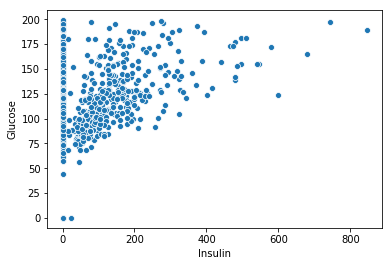

In [10]:
sns.scatterplot(data['Insulin'],data['Glucose'])

**Diabetic (class 1) & Non-Diabetic (class 0) counts**

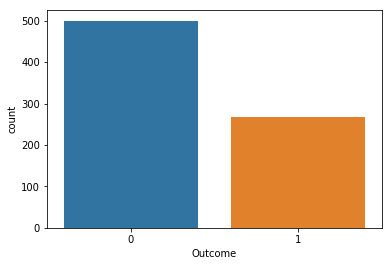

In [11]:
sns.countplot(data['Outcome'])

**Define input and Output to model**

In [12]:
# Input Features
x = data[features].values
# Output
y = data['Outcome'].values 

**Transform features by scaling each feature to a range (0,1)**

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

**Split the data into random train and test subsets**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

print('Training data samples : {}'.format(x_train.shape[0]))
print('Testing data samples  : {}'.format(x_test.shape[0]))

Training data samples : 614
Testing data samples  : 154


**KNeighbors Classifier**

In [15]:
# Knn with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
# Fit Knn on training dataset
knn.fit(x_train, y_train)
# Perform classification on test dataset
y_pred = knn.predict(x_test)
# Print Claasification Report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.75      0.80      0.77        99
     Class 1       0.59      0.53      0.56        55

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154



**Lets try Gaussian Naive Bayes**

In [16]:
# Gaussian Naive Bayes 
gnb = GaussianNB()
# Fit Gaussian Naive Bayes on training dataset
gnb.fit(x_train, y_train)
# Perform classification on test dataset
y_pred = gnb.predict(x_test)
# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.79      0.82        99
     Class 1       0.66      0.75      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154



**Naive Bayes classifiers have worked quite well on diabetes classification task despite it makes the “naive” assumption of conditional independence between every pair of features given the value of the class variable.**